In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


Text(0, 0.5, 'price US $')

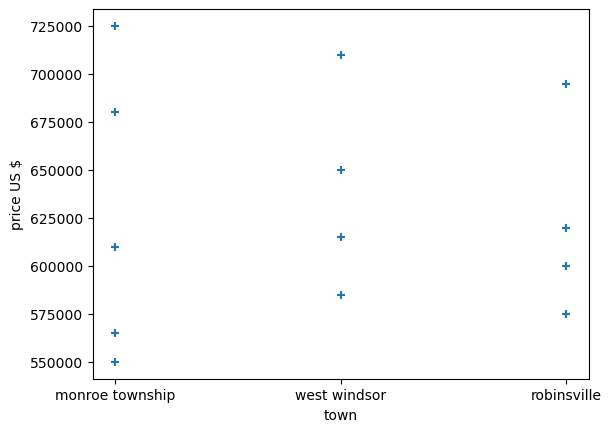

In [10]:
plt.scatter(df.town,df.price,marker="+")
plt.xlabel("town")
plt.ylabel("price US $")

Text(0, 0.5, 'price US $')

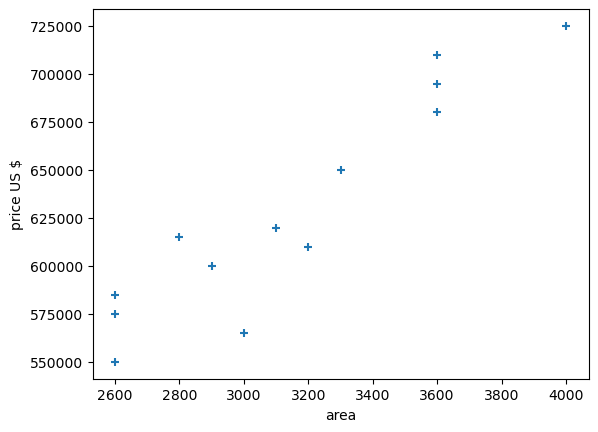

In [11]:
plt.scatter(df.area,df.price,marker="+")
plt.xlabel("area")
plt.ylabel("price US $")

In [15]:
dummies=pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [16]:
merged=pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [18]:
final=merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [24]:
from sklearn import linear_model
# from sklearn linear_model import LinearRegression
model=linear_model.LinearRegression()

In [28]:
X=final.drop(['price'],axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [29]:
Y=final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [30]:
model.fit(X,Y)

LinearRegression()

In [31]:
model.predict([[3400,0,0]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [32]:
model.coef_

array([   126.89744141, -40013.97548914, -14327.56396474])

In [33]:
model.intercept_

249790.36766292521

In [35]:
model.predict([[2800,1,0]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([565089.22812299])

In [37]:
model.score(X,Y)

0.9573929037221871

In [38]:
df
# USE ONE HOT ENCODING for the same process

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
dfle=df
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [44]:
X=dfle.drop(['price'],axis="columns")
X

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [45]:
Y=dfle.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(Categorical_features=[0])

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'Categorical_features'